Project Setup & Imports

In [3]:
# Install required libraries (only once per environment)
# !pip install numpy matplotlib tensorflow opencv-python scikit-learn

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from PIL import Image


Load and Preprocess the Dataset

In [5]:
# Define data path
train_dir = r"C:\Users\satya\Downloads\archive\chest_xray\train"

# Load and resize images
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (224, 224))  # Resize to fixed size
            images.append(img)
            labels.append(label)
    return images, labels

# Example: Load NORMAL and PNEUMONIA images
normal_images, normal_labels = load_images_from_folder(os.path.join(train_dir, "NORMAL"), 0)
pneumonia_images, pneumonia_labels = load_images_from_folder(os.path.join(train_dir, "PNEUMONIA"), 1)

# Combine and normalize
X = np.array(normal_images + pneumonia_images) / 255.0
y = np.array(normal_labels + pneumonia_labels)

X = X.reshape(-1, 224, 224, 1)  # Add channel dimension

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Define the CNN Model

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\satya\OneDrive\Desktop\Chest X-Ray Diagnosis Using CNN\chestx_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,168,513 (42.60 MB)

 Trainable params: 11,168,513 (42.60 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [7]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 67s 619ms/step - accuracy: 0.8136 - loss: 0.4349 - val_accuracy: 0.9389 - val_loss: 0.1718
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 63s 604ms/step - accuracy: 0.9641 - loss: 0.1082 - val_accuracy: 0.9581 - val_loss: 0.1227
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 61s 582ms/step - accuracy: 0.9625 - loss: 0.0937 - val_accuracy: 0.9653 - val_loss: 0.1214
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 63s 596ms/step - accuracy: 0.9756 - loss: 0.0586 - val_accuracy: 0.9449 - val_loss: 0.2063
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 62s 591ms/step - accuracy: 0.9735 - loss: 0.0650 - val_accuracy: 0.9509 - val_loss: 0.1842
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 63s 596ms/step - accuracy: 0.9869 - loss: 0.0340 - val_accuracy: 0.9425 - val_loss: 0.2046
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 63s 599ms/step - accuracy: 0.9811 - loss: 0.0463 - val_accuracy: 0.9689 - val_loss: 0.1346
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 63s 600ms/step - accuracy: 0.9942 - loss: 0

In [10]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

NameError: name 'X_train' is not defined

Evaluate the Model

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.9653 - loss: 0.1413
Test Accuracy: 0.9703


Save the Model

In [9]:
model.save("chest_xray_model.h5")


Confusion Matrix & Classification Report

33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step


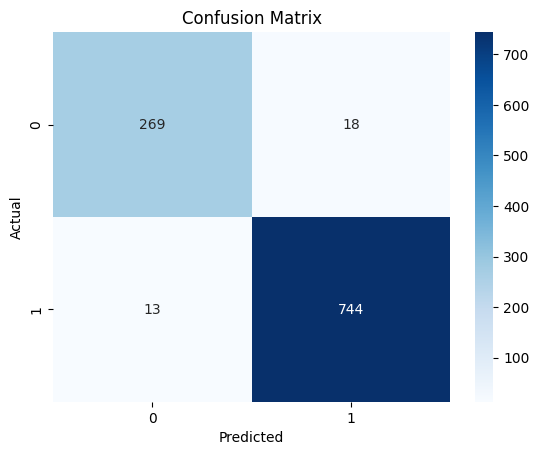

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       287
           1       0.98      0.98      0.98       757

    accuracy                           0.97      1044
   macro avg       0.97      0.96      0.96      1044
weighted avg       0.97      0.97      0.97      1044



In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_classes))


Save and Load Your Model

In [ ]:
# Save
model.save("xray_cnn_model.h5")

# Load
from tensorflow.keras.models import load_model
model = load_model("xray_cnn_model.h5")


Test on New X-ray Image (Real-World Test)

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load image
img = image.load_img(r"C:\Users\satya\Downloads\normalXray.jpg", target_size=(222, 222))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Predict
prediction = model.predict(img_array)
print("Prediction (0: Normal, 1: Pneumonia):", int(prediction[0][0] > 0.5))


Code for Accuracy/Loss Graph

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have history object from model.fit()
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Load Required Libraries

In [3]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk
import numpy as np
import cv2
import tensorflow as tf


In [4]:
img = Image.open(img_path).convert('L')  # Converts any image to grayscale


NameError: name 'Image' is not defined

Load Your Trained Model

In [5]:
# Load the trained model
model = tf.keras.models.load_model("chest_xray_model.h5")  # Replace with your actual model file path


Define Prediction Function

In [6]:
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  # Resize to match training input
    img_array = img / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return "Pneumonia Detected" if prediction[0][0] > 0.5 else "Normal"


Basic Static Chat Response

In [7]:
def chatbot_response(user_input):
    responses = {
        "what should i do": "Please consult a doctor immediately. Drink plenty of fluids and get rest.",
        "how to cure pneumonia": "Treatment includes antibiotics, rest, and sometimes hospitalization.",
        "is it dangerous": "Pneumonia can be serious. Early detection and treatment are important."
    }
    user_input = user_input.lower()
    return responses.get(user_input, "Sorry, I can only answer basic questions about pneumonia right now.")


Tkinter UI in Notebook

In [1]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk
import tensorflow as tf
import numpy as np
import subprocess


# ------------------------------------------------------------------------------
# 1️⃣ Loading Model
# ------------------------------------------------------------------------------
model = tf.keras.models.load_model("chest_xray_model.h5")  # Update path if needed


# ------------------------------------------------------------------------------
# 2️⃣ Image Prediction
# ------------------------------------------------------------------------------
def predict_image(file_path):
    """Perform Pneumonia Detection with trained Model."""
    img = Image.open(file_path).convert('L')  # Grayscale
    img = img.resize((224, 224))
    img_array = np.array(img).reshape(1, 224, 224, 1) / 255.0
    prediction = model.predict(img_array)
    return "Pneumonia" if prediction[0][0] > 0.5 else "Normal"


# ------------------------------------------------------------------------------
# 3️⃣ Ollama Chatbot (Real-Time) 
# ------------------------------------------------------------------------------
def chatbot_response(user_msg):
    """Get response from Ollama chatbot in real time."""
    try:
        response = subprocess.check_output(
            ['ollama', 'run', 'llama2'], 
            input=user_msg.encode(), 
            stderr=subprocess.DEVNULL
        )
        return response.decode().strip()
    except Exception as e:
        return f"Error communicating with Ollama: {str(e)}"


# ------------------------------------------------------------------------------
# 4️⃣ GUI Application with Modern UI
# ------------------------------------------------------------------------------
def launch_interface():
    """Launch GUI application for Pneumonia Detection with Ollama Chatbot."""
    root = tk.Tk()
    root.title("🫁 Chest X-Ray Pneumonia Detection")
    root.config(bg='#edf0f5')
    root.geometry("700x600")

    # ------------------------------------------------------------------------------
    # File upload functionality
    # ------------------------------------------------------------------------------
    def upload_image():
        """Select and predict on a new X-ray image."""
        file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.png *.jpeg")])
        if not file_path:
            return
        try:
            result = predict_image(file_path)
            result_label.config(text=f"Analysis result: {result}",
                                fg='green' if result == "Normal" else 'red')
            if result == "Pneumonia":
                chat_entry.config(state='normal')
                send_button.config(state='normal')
            else:
                chat_entry.config(state='disabled')
                send_button.config(state='disabled')
        except Exception as e:
            messagebox.showerror("Error", f"Unable to process image:\n{str(e)}")

    # ------------------------------------------------------------------------------
    # Send message to chatbot
    # ------------------------------------------------------------------------------
    def send_message():
        """Send message to chatbot and show response."""
        user_msg = chat_entry.get().strip()
        if not user_msg:
            return

        response = chatbot_response(user_msg)
        chat_output.config(state='normal')
        chat_output.insert(tk.END, f'👤 You: {user_msg}\n🤖 Bot: {response}\n\n')
        chat_output.config(state='disabled')
        chat_output.see(tk.END)

        chat_entry.delete(0, tk.END)


    # ------------------------------------------------------------------------------
    # UI elements
    # ------------------------------------------------------------------------------
    header = tk.Label(root, text='🫁 Chest X-Ray Pneumonia Detection',
                       font=('Helvetica', 18, 'bold'), bg='#edf0f5', fg='#334155')
    header.pack(pady=20)

    upload_button = tk.Button(root, text='Select X-Ray Image',
                                command=upload_image,
                                font=('Helvetica', 12), bg='#9333EA',
                                fg='white', pady=10)
    upload_button.pack()

    result_label = tk.Label(root, text='', font=('Helvetica', 14), bg='#edf0f5')
    result_label.pack(pady=20)

    chat_label = tk.Label(root, text='Chat with Ollama!', font=('Helvetica', 12, 'bold'), bg='#edf0f5')
    chat_label.pack()

    chat_output = tk.Text(root, height=10, width=60, state='disabled',
                           font=('Helvetica', 12), wrap='word')
    chat_output.pack(pady=10)

    chat_frame = tk.Frame(root, bg='#edf0f5')
    chat_frame.pack(pady=5)

    chat_entry = tk.Entry(chat_frame, width=50, font=('Helvetica', 12))
    chat_entry.grid(row=0, column=0, padx=5)

    send_button = tk.Button(chat_frame, text='Send',
                                font=('Helvetica', 12), command=send_message)
    send_button.grid(row=0, column=1, padx=5)


    root.mainloop()


# ------------------------------------------------------------------------------
# 5️⃣ Run Application
# ------------------------------------------------------------------------------
if __name__ == "__main__":
    launch_interface()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


KeyboardInterrupt: 